## Kerasによる銀河形態分類（Hubble系列4クラス）畳み込みニューラルネット  
### Chollet, F. (2018). *Deep Learning with Python.* Manning Publications Co. Chapter 5参照


In [1]:
import os, shutil
import sys, time
import keras
print(keras.__version__)

# 作業用ディレクトリ定義（要カスタマイズ）
galaxy_data_directory = '/home/satoshi/Galaxy/'

Using TensorFlow backend.


2.2.0


#### Keras Conv2Dモデル  input_shape;150

In [2]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', 
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

#### モデルのコンパイル

In [3]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
        optimizer=optimizers.RMSprop(lr=1e-4),
        metrics=['acc'])

#### イメージデータジェネレータ(Data augmentationあり)
#### 選別データセット　dataset_4class_selected_256_01_4000

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator用訓練データディレクトリ
train_generator_directory = galaxy_data_directory + 'train'
# ImageDataGenerator用検証データディレクトリ
validation_generator_directory = galaxy_data_directory + 'validation'
# ImageDataGenerator用テストデータディレクトリ
test_generator_directory = galaxy_data_directory + 'test'

# 訓練データのaugmentation　
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40, 
    width_shift_range=0.2,
    height_shift_range=0.2, 
    #shear_range=0.2, 
    zoom_range=0.2, )
    #horizontal_flip=True, )
    
# 訓練データジェネレータ　バッチサイズ：　40
train_generator = train_datagen.flow_from_directory(
        train_generator_directory,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')
print(train_generator.class_indices)

# 検証データジェネレータ　バッチサイズ：　40
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
        validation_generator_directory,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')
print(validation_generator.class_indices)

# テストデータジェネレータ　バッチサイズ：　40
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_generator_directory,
        target_size=(150, 150),
        batch_size=40,
        class_mode='categorical')
print(test_generator.class_indices)

Found 8000 images belonging to 4 classes.
{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}
Found 4000 images belonging to 4 classes.
{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}
Found 4000 images belonging to 4 classes.
{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}


#### モデルの学習

In [5]:
# 学習　エポック数：　200
history = model.fit_generator(
        train_generator,
        # 訓練データ件数4x2000=8000, バッチサイズ40 => 8000/40=200 steps/epoch
        steps_per_epoch=200,  
        epochs=200,
        # 検証データ件数4x1000=4000, バッチサイズ40 => 4000/40=100 steps/epoch
        validation_data=validation_generator,
        validation_steps=100)

Epoch 1/200
200/200 [==============================] - 43s 217ms/step - loss: 1.0021 - acc: 0.5165 - val_loss: 0.8525 - val_acc: 0.5715
Epoch 2/200
200/200 [==============================] - 41s 205ms/step - loss: 0.8726 - acc: 0.5871 - val_loss: 0.8036 - val_acc: 0.6248
Epoch 3/200
200/200 [==============================] - 42s 209ms/step - loss: 0.8103 - acc: 0.6302 - val_loss: 0.6857 - val_acc: 0.6595
Epoch 4/200
200/200 [==============================] - 41s 206ms/step - loss: 0.7611 - acc: 0.6547 - val_loss: 0.5987 - val_acc: 0.7190
Epoch 5/200
200/200 [==============================] - 41s 207ms/step - loss: 0.7210 - acc: 0.6736 - val_loss: 0.5854 - val_acc: 0.7302
Epoch 6/200
200/200 [==============================] - 41s 206ms/step - loss: 0.6990 - acc: 0.6844 - val_loss: 0.5556 - val_acc: 0.7395
Epoch 7/200
200/200 [==============================] - 41s 205ms/step - loss: 0.6610 - acc: 0.7046 - val_loss: 0.5569 - val_acc: 0.7413
Epoch 8/200
200/200 [===========================

Epoch 61/200
200/200 [==============================] - 42s 210ms/step - loss: 0.4234 - acc: 0.8088 - val_loss: 0.4195 - val_acc: 0.8125
Epoch 62/200
200/200 [==============================] - 42s 208ms/step - loss: 0.4182 - acc: 0.8130 - val_loss: 0.3836 - val_acc: 0.8295
Epoch 63/200
200/200 [==============================] - 42s 210ms/step - loss: 0.4172 - acc: 0.8153 - val_loss: 0.3827 - val_acc: 0.8270
Epoch 64/200
200/200 [==============================] - 41s 207ms/step - loss: 0.4159 - acc: 0.8152 - val_loss: 0.4641 - val_acc: 0.7850
Epoch 65/200
200/200 [==============================] - 42s 209ms/step - loss: 0.4210 - acc: 0.8143 - val_loss: 0.3817 - val_acc: 0.8278
Epoch 66/200
200/200 [==============================] - 41s 206ms/step - loss: 0.4128 - acc: 0.8182 - val_loss: 0.4032 - val_acc: 0.8210
Epoch 67/200
200/200 [==============================] - 42s 208ms/step - loss: 0.4132 - acc: 0.8200 - val_loss: 0.3898 - val_acc: 0.8260
Epoch 68/200
200/200 [===================

200/200 [==============================] - 41s 204ms/step - loss: 0.3227 - acc: 0.8682 - val_loss: 0.3803 - val_acc: 0.8435
Epoch 180/200
200/200 [==============================] - 41s 207ms/step - loss: 0.3240 - acc: 0.8686 - val_loss: 0.3569 - val_acc: 0.8535
Epoch 181/200
200/200 [==============================] - 41s 207ms/step - loss: 0.3234 - acc: 0.8722 - val_loss: 0.3532 - val_acc: 0.8585
Epoch 182/200
200/200 [==============================] - 42s 212ms/step - loss: 0.3308 - acc: 0.8610 - val_loss: 0.3353 - val_acc: 0.8627
Epoch 183/200
200/200 [==============================] - 41s 206ms/step - loss: 0.3216 - acc: 0.8682 - val_loss: 0.3283 - val_acc: 0.8667
Epoch 184/200
200/200 [==============================] - 41s 206ms/step - loss: 0.3232 - acc: 0.8697 - val_loss: 0.3460 - val_acc: 0.8563
Epoch 185/200
200/200 [==============================] - 41s 207ms/step - loss: 0.3246 - acc: 0.8684 - val_loss: 0.3719 - val_acc: 0.8503
Epoch 186/200
200/200 [=========================

In [6]:
# モデルの退避
model.save(galaxy_data_directory + 'galaxy_cnn_4class_256px_sf01_selected_model.h5')

#### 学習履歴のビジュアル化

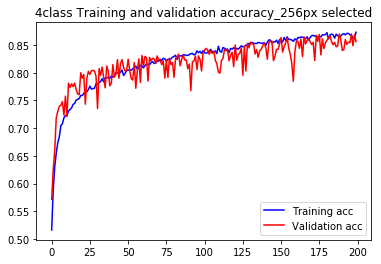

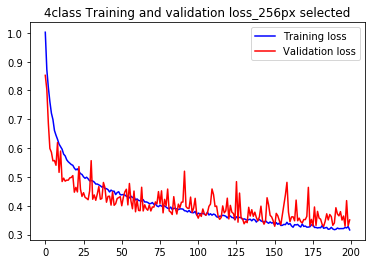

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('4class Training and validation accuracy_256px selected')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('4class Training and validation loss_256px selected')
plt.legend()

plt.show()

#### テストデータセットによる精度評価

In [8]:
metric = model.evaluate_generator(test_generator)
print('Test loss = ', metric[0])
print('Test acc  = ', metric[1])

Test loss =  0.344819150865078
Test acc  =  0.8564999973773957


#### テストデータセットからサンプリングした銀河イメージデータについての形態クラス予測結果

{'Edgeon': 0, 'En': 1, 'S': 2, 'SB': 3}
Edgeon_1_21_81_587739407836905615.jpeg
Edgeon : 92%   S : 6%   SB : 0%   En : 0%   


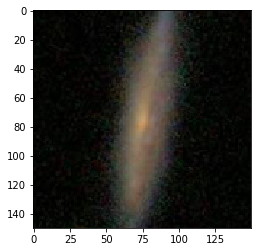

Edgeon_2_8_79_587733609087369453.jpeg
Edgeon : 98%   SB : 1%   S : 0%   En : 0%   


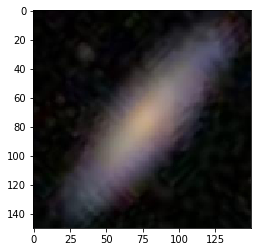

Edgeon_2_6_60_587732053238874291.jpeg
Edgeon : 90%   S : 7%   SB : 2%   En : 0%   


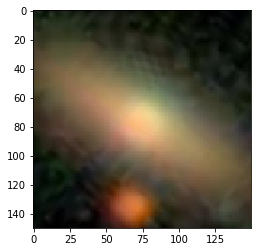

Edgeon_2_17_48_587736977421828344.jpeg
Edgeon : 99%   S : 0%   SB : 0%   En : 0%   


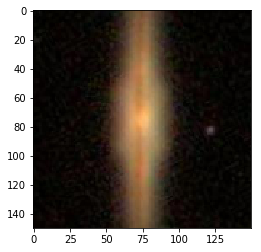

Edgeon_1_24_54_587741490352226845.jpeg
Edgeon : 97%   S : 2%   SB : 0%   En : 0%   


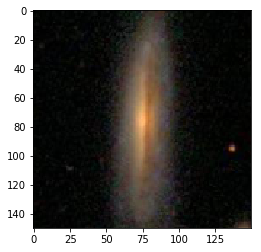

Edgeon_1_12_109_587736920507154461.jpeg
S : 46%   SB : 28%   Edgeon : 24%   En : 0%   


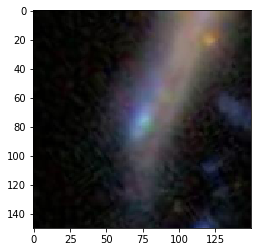

Edgeon_0_18_109_587739828738326631.jpeg
S : 48%   Edgeon : 36%   SB : 12%   En : 2%   


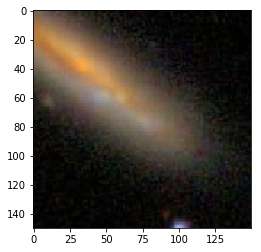

Edgeon_2_7_94_587739706338312250.jpeg
Edgeon : 99%   SB : 0%   S : 0%   En : 0%   


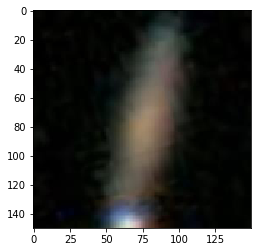

Edgeon_2_10_66_587735661015924823.jpeg
Edgeon : 94%   S : 4%   SB : 1%   En : 0%   


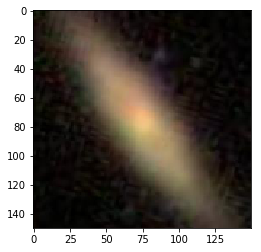

Edgeon_1_17_113_587742568928772263.jpeg
S : 64%   Edgeon : 24%   SB : 11%   En : 0%   


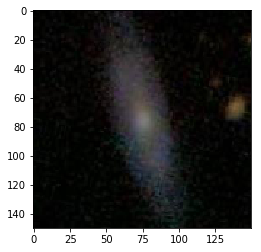

En_0_7_121_587726033328341198.jpeg
En : 99%   Edgeon : 0%   SB : 0%   S : 0%   


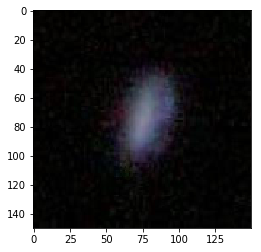

En_0_15_107_587745969464410319.jpeg
En : 100%   Edgeon : 0%   S : 0%   SB : 0%   


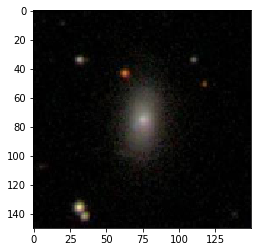

En_0_27_70_587738196647084124.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


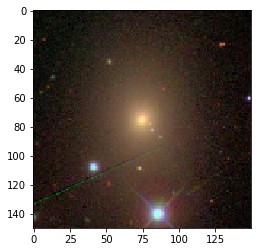

En_0_8_130_587729155206021227.jpeg
En : 99%   SB : 0%   Edgeon : 0%   S : 0%   


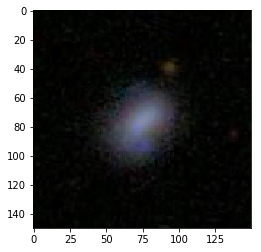

En_0_9_119_587735043070427478.jpeg
En : 99%   S : 0%   SB : 0%   Edgeon : 0%   


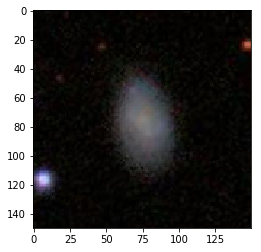

En_0_11_98_587741722823885065.jpeg
En : 100%   S : 0%   SB : 0%   Edgeon : 0%   


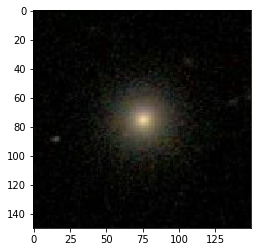

En_0_5_122_588017605231575208.jpeg
En : 99%   Edgeon : 0%   SB : 0%   S : 0%   


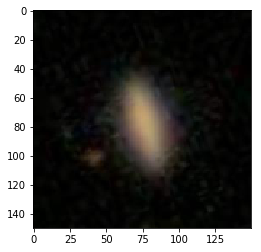

En_1_11_92_587742572687655072.jpeg
En : 100%   S : 0%   SB : 0%   Edgeon : 0%   


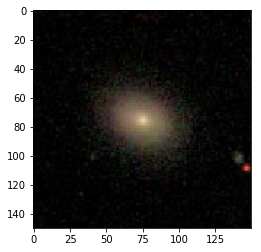

En_1_9_84_588017979433484431.jpeg
En : 100%   SB : 0%   S : 0%   Edgeon : 0%   


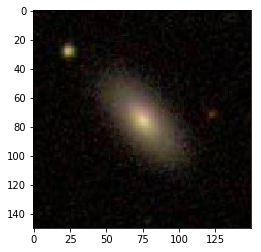

En_0_11_132_587739406266728765.jpeg
En : 99%   Edgeon : 0%   SB : 0%   S : 0%   


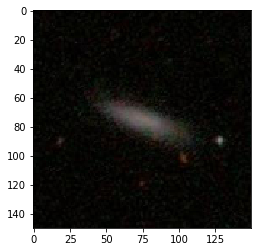

S_1_15_50_588017978334970017.jpeg
S : 62%   SB : 28%   Edgeon : 5%   En : 2%   


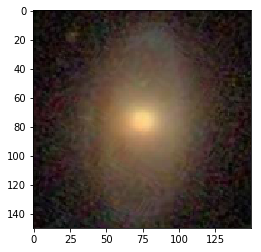

S_1_12_113_587724648191098982.jpeg
S : 79%   SB : 20%   Edgeon : 0%   En : 0%   


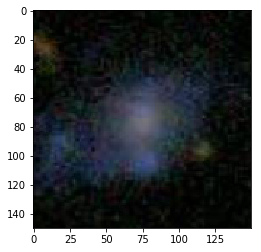

S_1_13_95_587742576447455352.jpeg
S : 78%   SB : 21%   Edgeon : 0%   En : 0%   


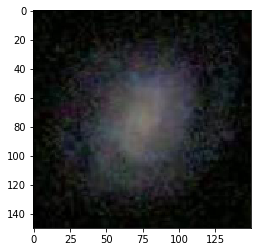

S_0_25_81_587738411409408100.jpeg
S : 60%   SB : 39%   Edgeon : 0%   En : 0%   


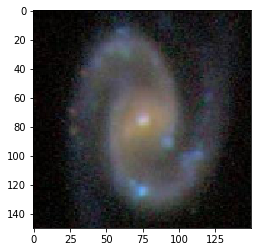

S_1_6_105_587739114702700708.jpeg
SB : 82%   S : 15%   Edgeon : 1%   En : 0%   


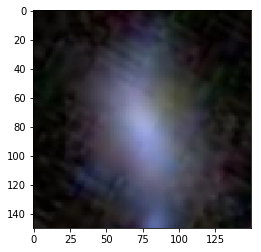

S_1_11_73_587742013819650116.jpeg
S : 81%   SB : 18%   Edgeon : 0%   En : 0%   


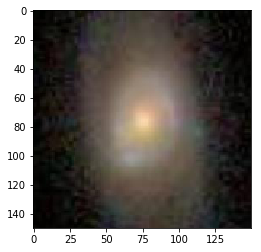

S_1_10_87_587729408621937309.jpeg
SB : 80%   S : 19%   Edgeon : 0%   En : 0%   


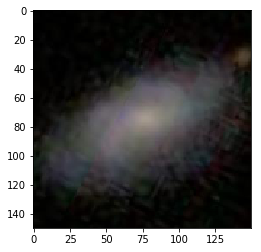

S_1_14_93_587741816241258696.jpeg
S : 65%   SB : 34%   Edgeon : 0%   En : 0%   


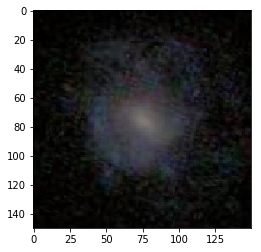

S_0_23_118_587738067808944242.jpeg
S : 96%   SB : 3%   Edgeon : 0%   En : 0%   


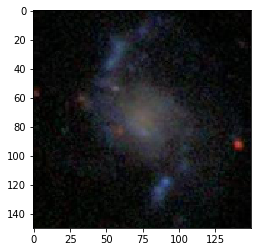

S_1_10_107_587732578845589731.jpeg
Edgeon : 86%   S : 11%   SB : 2%   En : 0%   


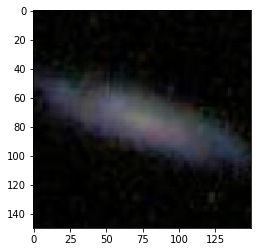

SB_2_6_89_588007004727476459.jpeg
SB : 81%   S : 18%   Edgeon : 0%   En : 0%   


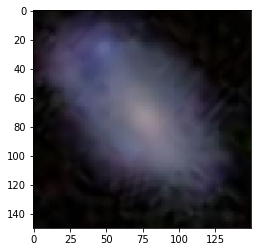

SB_2_11_94_587741708884181064.jpeg
SB : 78%   S : 21%   Edgeon : 0%   En : 0%   


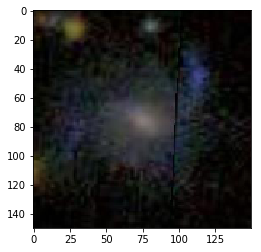

SB_2_11_65_587739651034054930.jpeg
SB : 48%   S : 48%   Edgeon : 2%   En : 0%   


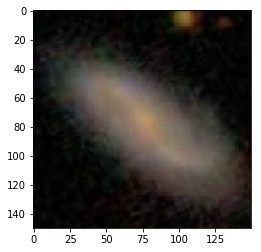

SB_2_19_39_588017979454193856.jpeg
SB : 90%   S : 9%   Edgeon : 0%   En : 0%   


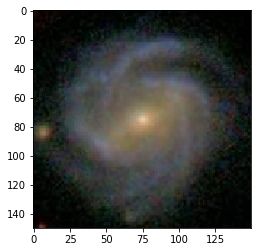

SB_2_10_67_587725551216885859.jpeg
S : 57%   SB : 42%   Edgeon : 0%   En : 0%   


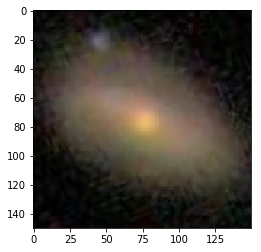

SB_1_12_85_587728669880877107.jpeg
SB : 97%   S : 2%   Edgeon : 0%   En : 0%   


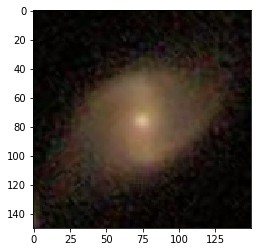

SB_0_16_76_587739407831990535.jpeg
S : 52%   SB : 46%   En : 0%   Edgeon : 0%   


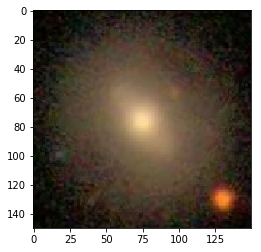

SB_1_10_86_587739115782144128.jpeg
SB : 66%   S : 33%   Edgeon : 0%   En : 0%   


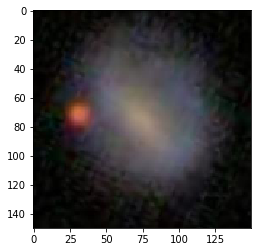

SB_1_15_77_587742551759782208.jpeg
SB : 84%   S : 15%   Edgeon : 0%   En : 0%   


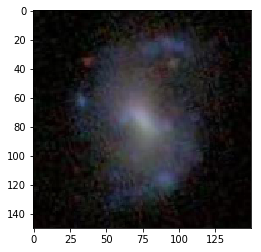

SB_2_11_98_587729232514121968.jpeg
SB : 79%   S : 19%   Edgeon : 1%   En : 0%   


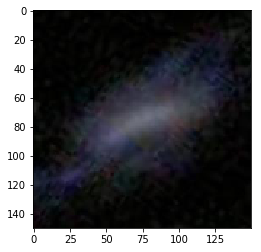

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
from PIL import Image

#クラス予測サンプリング数
sample_size = 10

class_indices_dict = test_generator.class_indices
print(class_indices_dict)
class_list = list(class_indices_dict.keys())

for class_name in class_list:
    prediction_fnames_series = pd.Series(np.array(os.listdir(test_generator_directory + '/' + class_name)))
    prediction_fnames_selected = prediction_fnames_series.sample(n=sample_size).values
    
    for prediction_fname in prediction_fnames_selected:
        print(prediction_fname)
        prediction_img = load_img(test_generator_directory + '/' + class_name + '/' + prediction_fname, target_size = (150,150))
        prediction_arr = img_to_array(prediction_img)
        prediction_arr /= 255.0
        input_arr = prediction_arr.reshape(1,150,150,3)
        probs = model.predict(input_arr)[0]
        probs_series_sorted = pd.Series(probs, index = class_list).sort_values(ascending=False)
        #print(probs_series_sorted.index)
        #print(probs_series_sorted)
        prediction_results = ''
        for class_index in probs_series_sorted.index:
            prediction_results += class_index + ' : ' + str(int(probs_series_sorted[class_index] * 100)) + '%' + '   ' 
            #prediction_results_list = prediction_results_list.append(prediction_results)                                             
            
        print(prediction_results)                                              
        plt.imshow(input_arr[0])
        plt.show()
        